In [ ]:
pip install chembl_webresource_client mordred numpy pandas scikit-learn matplotlib rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.4 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=9cd9638f298b94041ff5d0fd517c1958371d3a527a855decc450a84471e32e23
  Stored in directory: /root/.cache/pip/wheels/8b/30/0b/84e3f6775306e74cf5957ee4d16b10bf3927dcec44cc23d5f2
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does no

In [ ]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Check available tables in the database

Check columns in a table

In [ ]:
# Specify the path to your Excel file
file_path = '/content/drive/MyDrive/solubility/solubility dataset.xls'

# Read the Excel file and skip the first N rows (e.g., skip the first 3 rows)
df_sol = pd.read_excel(file_path, skiprows=9)

In [ ]:
print(df_sol.head())  # Display the first few rows of the DataFrame

           SMILES   LogS  assigned weight based on quality
0   BrC(Br)(Br)Br -3.140                               1.0
1       BrC(Br)Br -1.808                               1.0
2  BrC(Br)C(Br)Br -2.732                               1.0
3      BrC1CCCCC1 -2.294                               1.0
4           BrCBr -1.165                               1.0


In [ ]:
print(df_sol.isnull().sum())  # Check for missing values in each column

SMILES                              0
LogS                                0
assigned weight based on quality    0
dtype: int64


In [ ]:
print(df_sol.shape)


(3942, 3)


**Step 2: Extracting descriptors from Mordred**

In [ ]:
# Import necessary libraries as above
from rdkit import Chem
from mordred import Calculator, descriptors

# DataFrame `df_sol` with a 'canonical_smiles' column
smiles = df_sol['SMILES']

# Convert SMILES strings to RDKit Molecule objects
mols = [Chem.MolFromSmiles(s) for s in smiles]

# Initialize the Mordred descriptor calculator
calc = Calculator(descriptors, ignore_3D=True)

# Calculate the descriptors and store them in a DataFrame
df_descriptor = calc.pandas(mols)

# Show the result
df_descriptor = df_descriptor.astype(float)
df_descriptor.dropna(axis=1, how='all', inplace = True)
print(df_descriptor)


100%|██████████| 3942/3942 [06:56<00:00,  9.46it/s]


      nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A   SpMAD_A  \
0       0.0    0.0   4.000000  2.000000  4.000000   4.000000  0.800000   
1       0.0    0.0   3.464102  1.732051  3.464102   3.464102  0.866025   
2       0.0    0.0   6.000000  2.000000  4.000000   6.000000  1.000000   
3       0.0    0.0   8.720566  2.101003  4.202006   8.720566  1.245795   
4       0.0    0.0   2.828427  1.414214  2.828427   2.828427  0.942809   
...     ...    ...        ...       ...       ...        ...       ...   
3937    0.0    0.0  10.472136  2.236068  4.472136  10.472136  1.163571   
3938    0.0    0.0   5.226252  1.847759  3.695518   5.226252  1.045250   
3939    0.0    0.0  22.099492  2.246980  4.493959  22.099492  1.227750   
3940    0.0    0.0   4.472136  1.618034  3.236068   4.472136  1.118034   
3941    0.0    0.0   4.472136  1.618034  3.236068   4.472136  1.118034   

       LogEE_A     VE1_A     VE2_A  ...     SRW10     TSRW10          MW  \
0     2.444466  2.121320  0.424264 

Resetting the index ensures that the DataFrame's index is a simple range starting from 0, and it makes it easier to work with

In [ ]:
df_sol.reset_index(drop=True, inplace=True)
df_descriptor.reset_index(drop=True, inplace=True)

Combine descriptor dataframe to chembl solubility dataframe

In [ ]:
df_sol_des = pd.concat([df_sol, df_descriptor], axis=1)

Check how many rows and columns

In [ ]:
print(len(df_sol_des), len(df_sol_des.columns))

3942 1518


Take a look into the combined dataset

In [ ]:
df_sol_des

,SMILES,LogS,assigned weight based on quality,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,BrC(Br)(Br)Br,-3.140,1.000,0.0,0.0,4.000000,2.000000,4.000000,4.000000,0.800000,...,7.625107,29.418928,327.673348,65.534670,16.0,0.0,20.0,16.0,4.062500,1.000000
1,BrC(Br)Br,-1.808,1.000,0.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,...,6.188264,24.179697,249.762836,49.952567,9.0,0.0,12.0,9.0,3.111111,1.000000
2,BrC(Br)C(Br)Br,-2.732,1.000,0.0,0.0,6.000000,2.000000,4.000000,6.000000,1.000000,...,7.626083,30.698690,341.688998,42.711125,29.0,4.0,22.0,21.0,4.222222,1.444444
3,BrC1CCCCC1,-2.294,1.000,0.0,0.0,8.720566,2.101003,4.202006,8.720566,1.245795,...,8.124151,33.544698,162.004412,9.000245,42.0,5.0,30.0,31.0,2.361111,1.666667
4,BrCBr,-1.165,1.000,0.0,0.0,2.828427,1.414214,2.828427,2.828427,0.942809,...,4.174387,17.310771,171.852324,34.370465,4.0,0.0,6.0,4.0,2.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,BrCC(CBr)(CBr)CBr,-5.380,0.425,0.0,0.0,10.472136,2.236068,4.472136,10.472136,1.163571,...,8.741456,37.303280,383.735949,22.572703,88.0,12.0,36.0,40.0,5.062500,2.500000
3938,BrCC(Br)Br,-2.730,0.425,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,...,6.834109,27.254130,263.778486,32.972311,18.0,2.0,16.0,14.0,3.361111,1.333333
3939,BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-7.870,0.425,0.0,0.0,22.099492,2.246980,4.493959,22.099492,1.227750,...,9.336709,49.982153,635.650873,17.656969,585.0,27.0,84.0,93.0,8.166667,4.083333
3940,Br/C=C\Br,-1.390,0.425,0.0,0.0,4.472136,1.618034,3.236068,4.472136,1.118034,...,5.509388,22.328143,183.852324,30.642054,10.0,1.0,10.0,8.0,2.500000,1.250000


We need to convert ug/mL to nM to have singe similar unit

Text(0, 0.5, 'Aqueous solubility (LogS)')

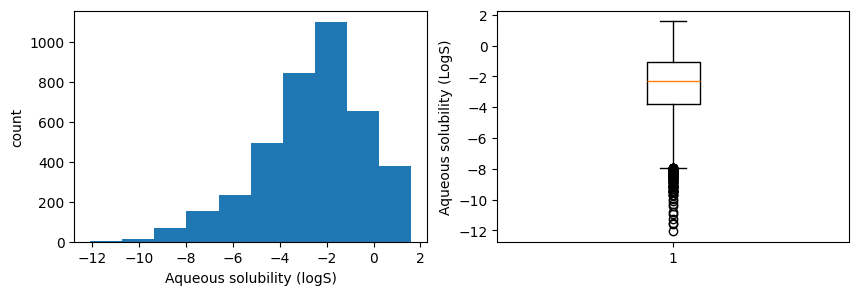

In [ ]:
f,axs = plt.subplots(1,2,figsize=(10,3))
axs[0].hist(df_sol_des ['LogS'])
axs[0].set_xlabel('Aqueous solubility (logS)')
axs[0].set_ylabel('count')
axs[1].boxplot(df_sol_des ['LogS'])
axs[1].set_ylabel('Aqueous solubility (LogS)')

In [ ]:
# Define the path to Google Drive (make sure the folder exists)
file_path = '/content/drive/MyDrive/solubility/sol_des_clean.zip'

# Set compression options for saving the DataFrame as a .zip file
compression_opts = dict(method='zip', archive_name='sol_des_clean.csv')

# Save the DataFrame as a compressed .zip file in Google Drive
df_sol_des.to_csv(file_path, index=False, compression=compression_opts)